Part 1

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%matplotlib inline

In [4]:
tips = sns.load_dataset('tips')

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


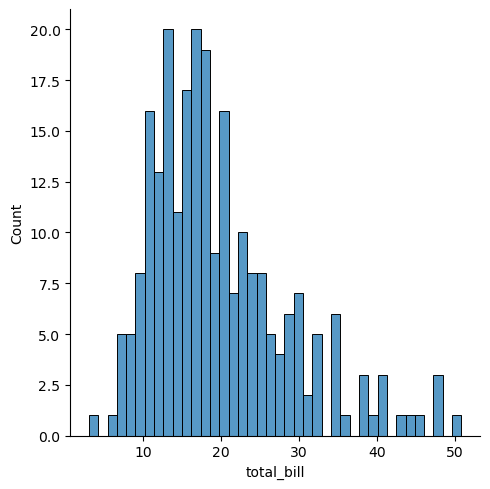

In [6]:
sns.displot(tips['total_bill'],kde=False,bins=40)
plt.show()

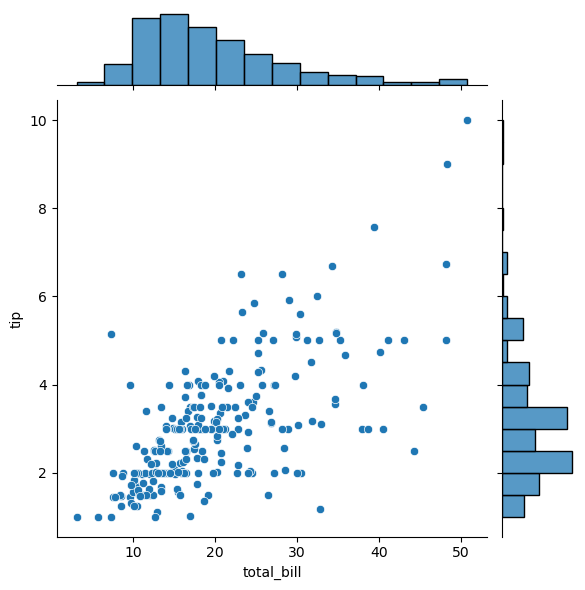

In [7]:
sns.jointplot(x='total_bill',y='tip',data=tips)
plt.show()

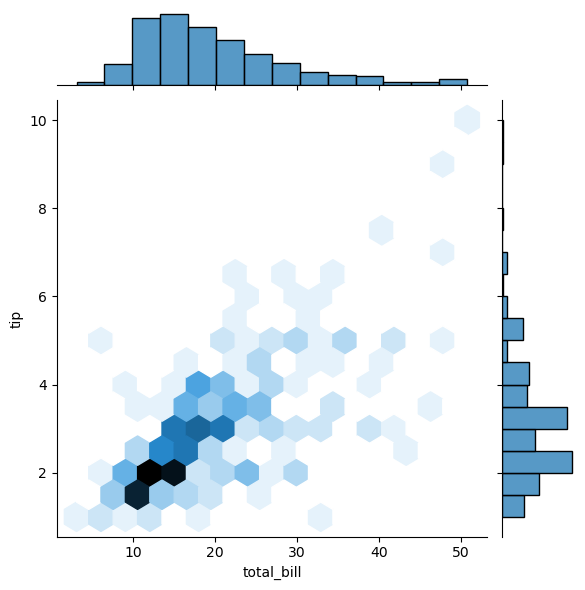

In [8]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')
plt.show()

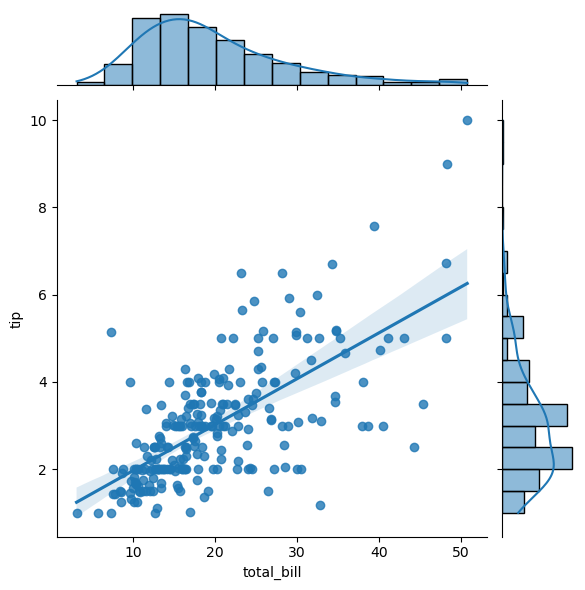

In [9]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')
plt.show()

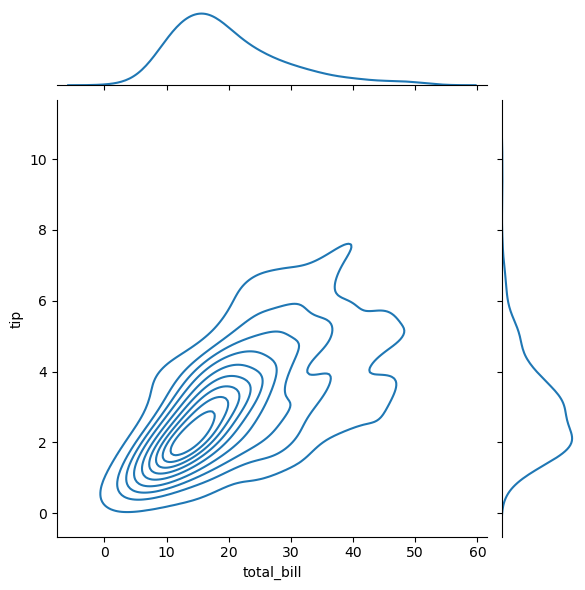

In [10]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')
plt.show()

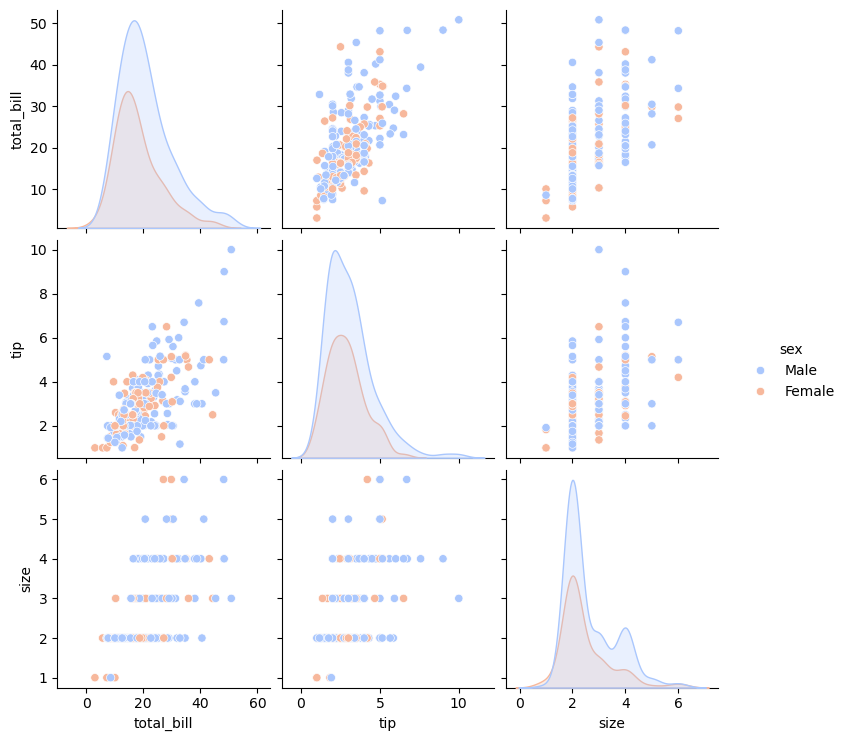

In [11]:
sns.pairplot(tips,hue='sex',palette='coolwarm')
plt.show()

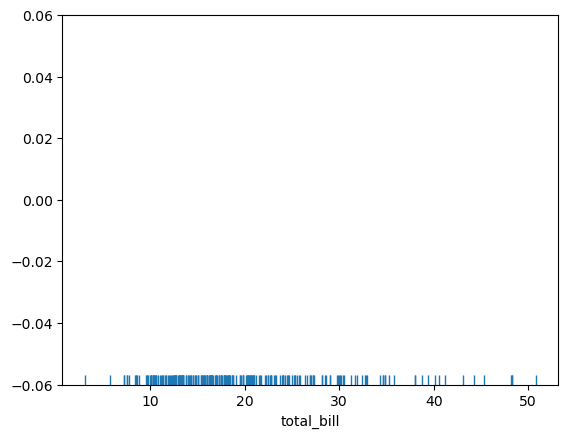

In [12]:
sns.rugplot(tips['total_bill'])
plt.show()

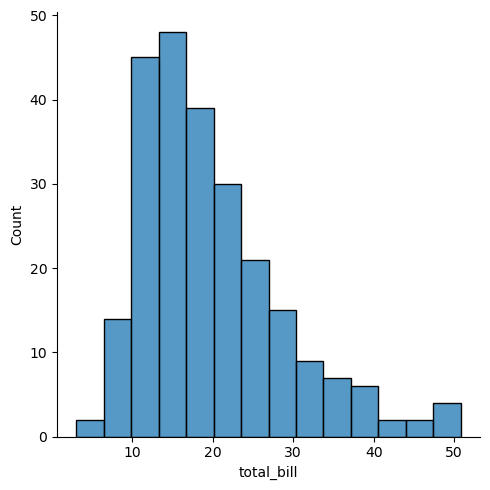

In [13]:
sns.displot(tips['total_bill'],kde=False)
plt.show()

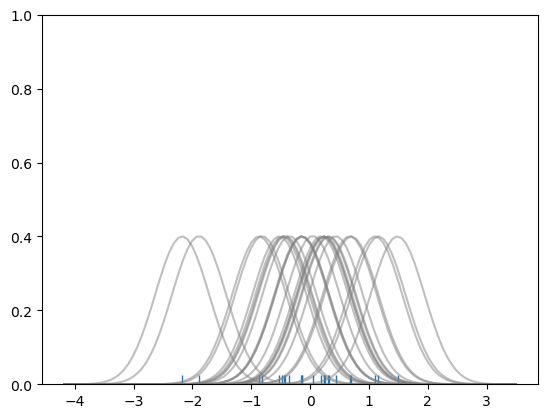

In [14]:
#kde plot stands for kernel density estimation plots, normal distribution is a bell curve. A KDE is a sum of all the normal distributions for each plot point
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)
plt.show()

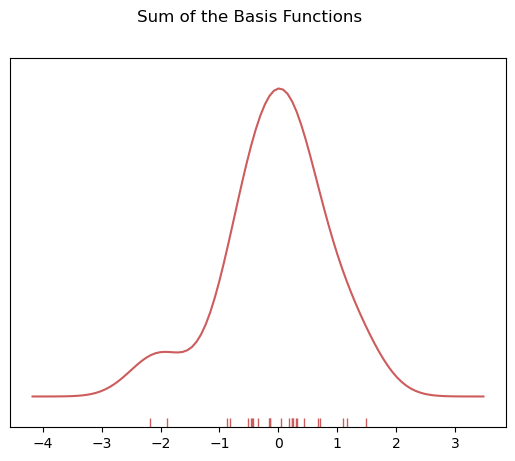

In [15]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")
plt.show()

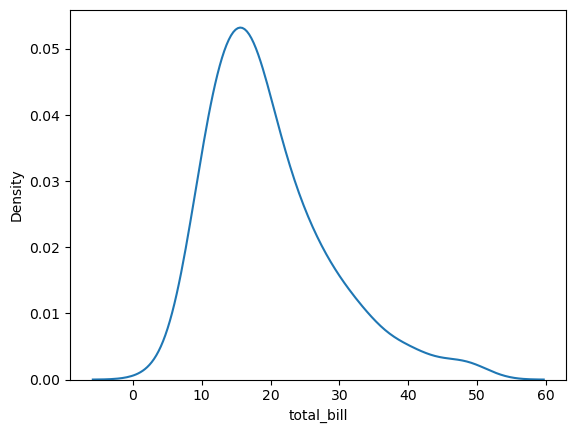

In [16]:
sns.kdeplot(tips['total_bill'])
plt.show()

Part 2 Categorical Plots

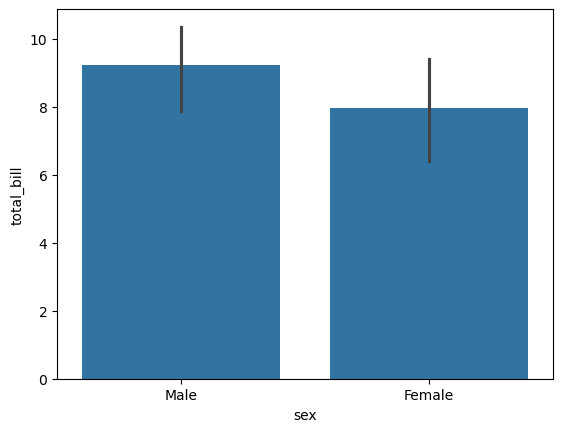

In [18]:
#can pass in numpy or other estiamtor functions from even numpy, for instance this shows variance or Standard adeviation
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)
plt.show()

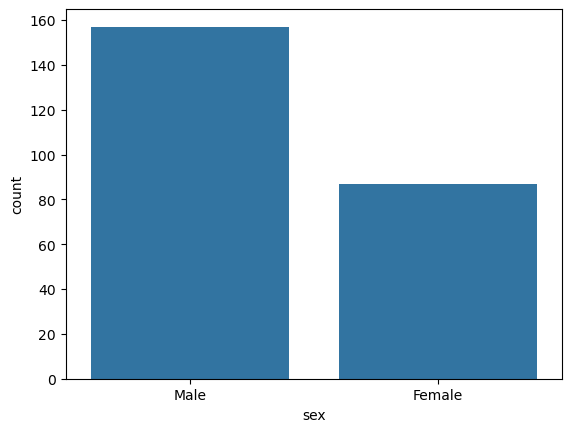

In [19]:
sns.countplot(x='sex',data=tips)
plt.show()

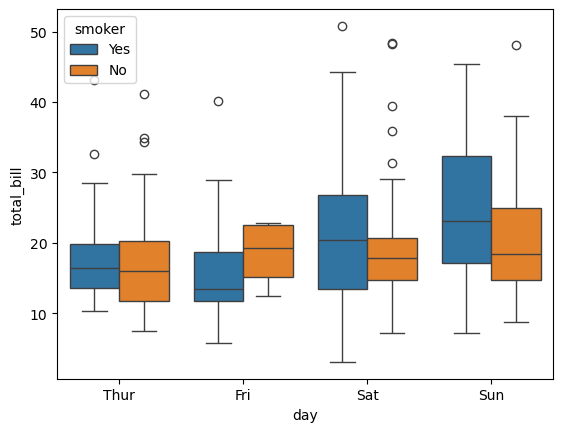

In [20]:
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')
plt.show()

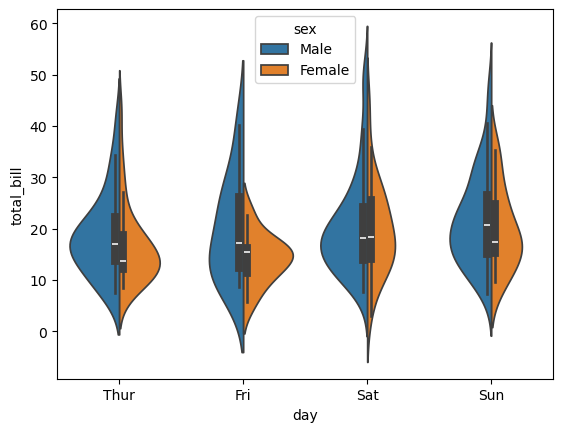

In [21]:
#split shows unmirrored distribution, dodge seperates hues
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True,dodge=True)
plt.show()

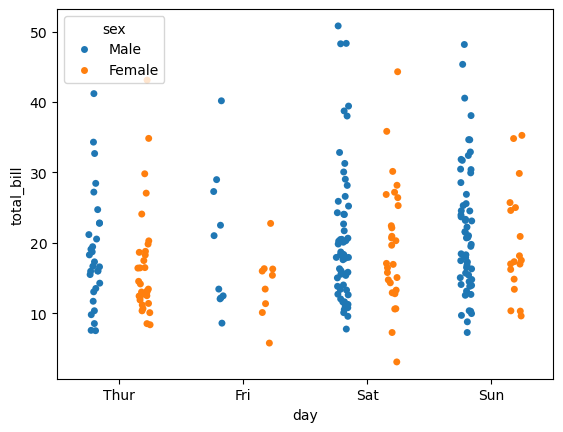

In [22]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,hue='sex',dodge=True)
plt.show()

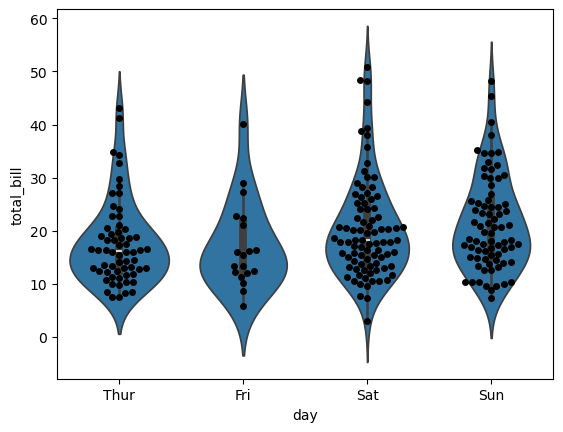

In [23]:
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color='black')
plt.show()

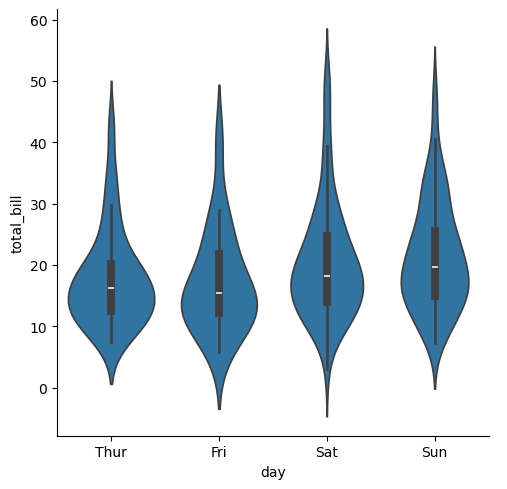

In [24]:
#catplot can be used to do all these different plots in one line just using kind
sns.catplot(x='day',y='total_bill',data=tips,kind='violin')
plt.show()

Part 3 Matrix

In [50]:
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [52]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [68]:
#matrix form is variables on columns and also the rows
tc = tips.corr(numeric_only=True)
display(tc)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


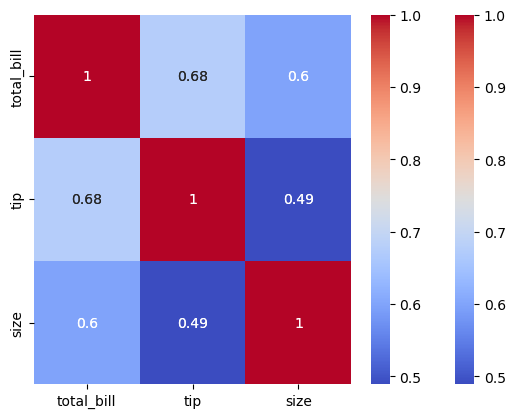

In [74]:
sns.heatmap(tc,annot=True,cmap='coolwarm')
plt.show()

In [78]:
display(flights)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [82]:
fp = flights.pivot_table(index='month',columns='year',values='passengers')

C:\Users\evanp\AppData\Local\Temp\ipykernel_23260\3579568968.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  fp = flights.pivot_table(index='month',columns='year',values='passengers')


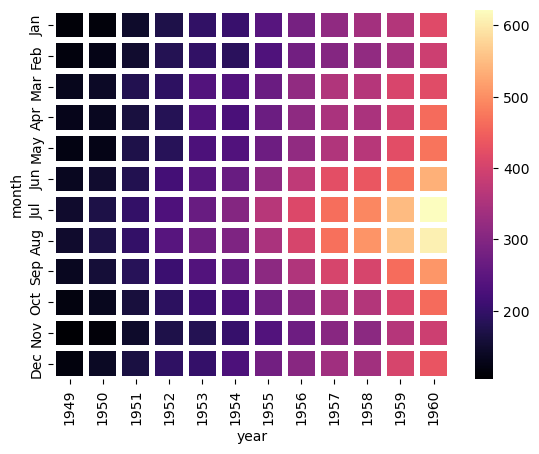

In [96]:
sns.heatmap(fp,cmap='magma',linecolor='white',linewidths=3)
plt.show()

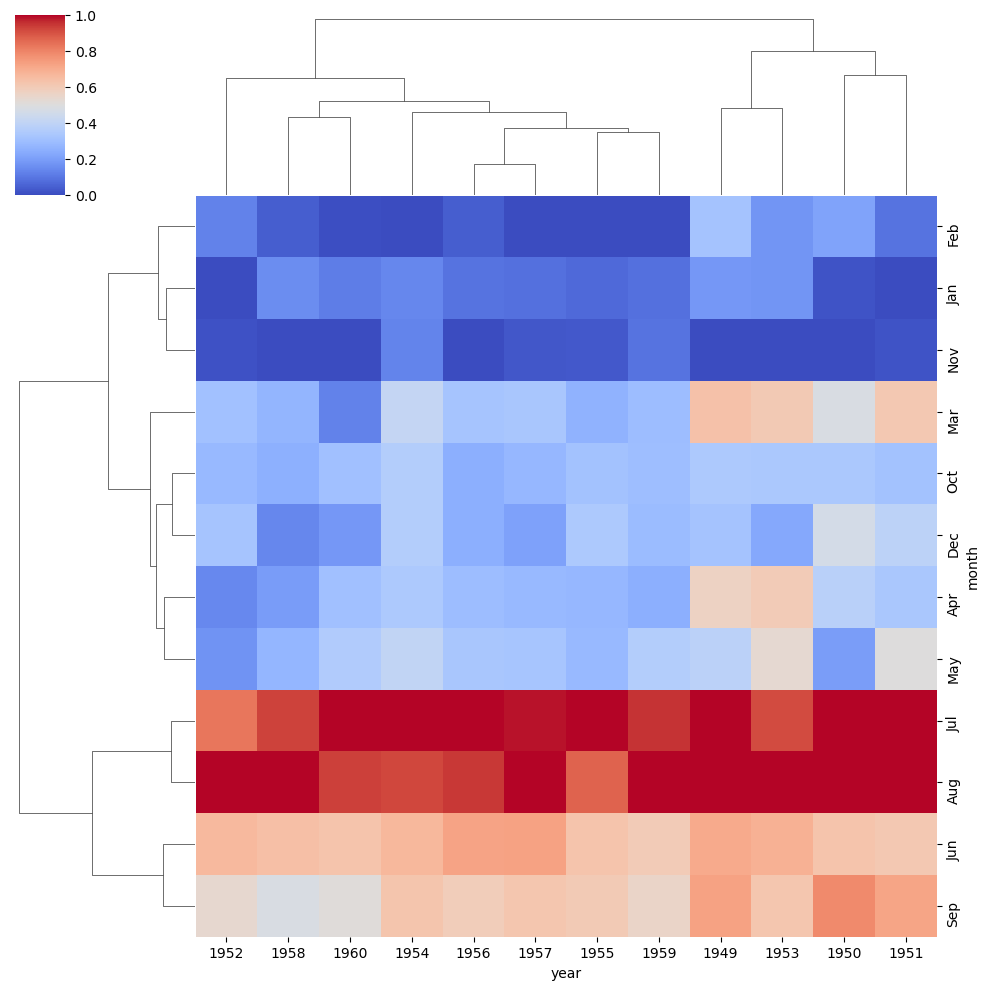

In [106]:
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)
plt.show()

Grids

In [109]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [111]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

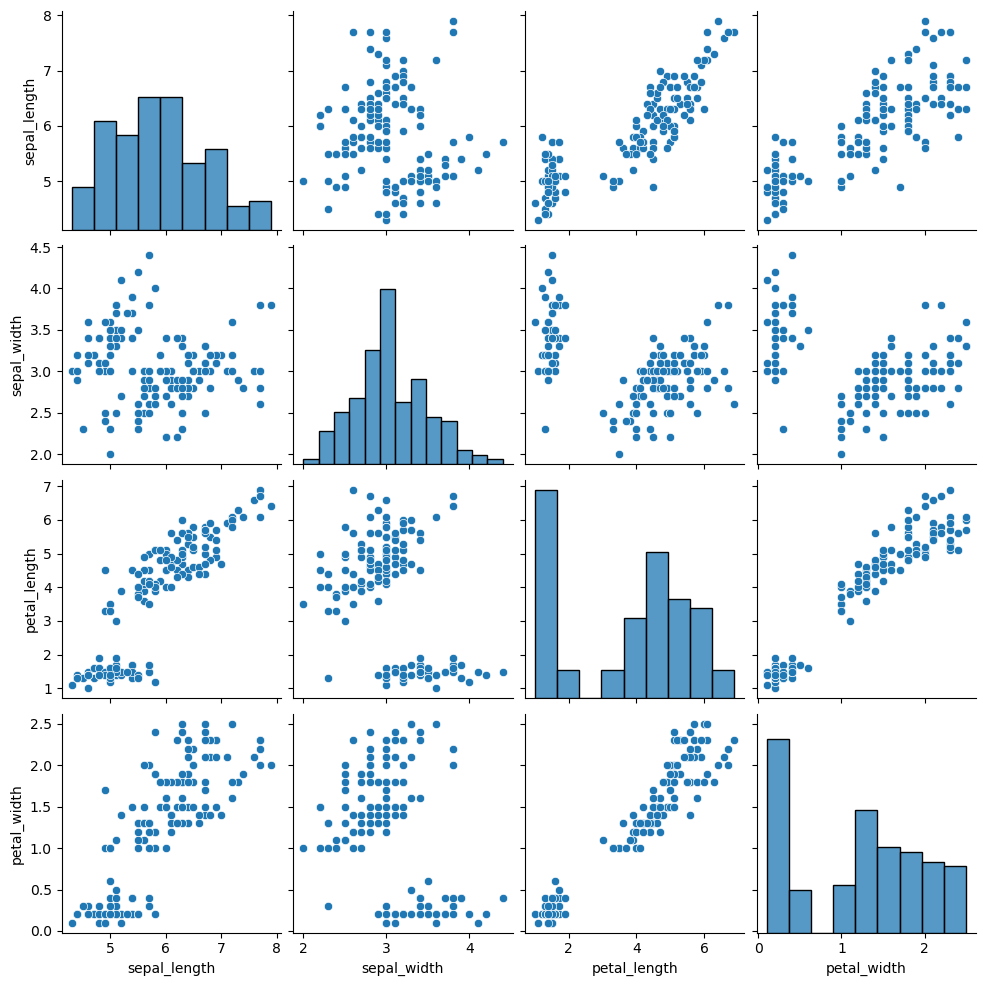

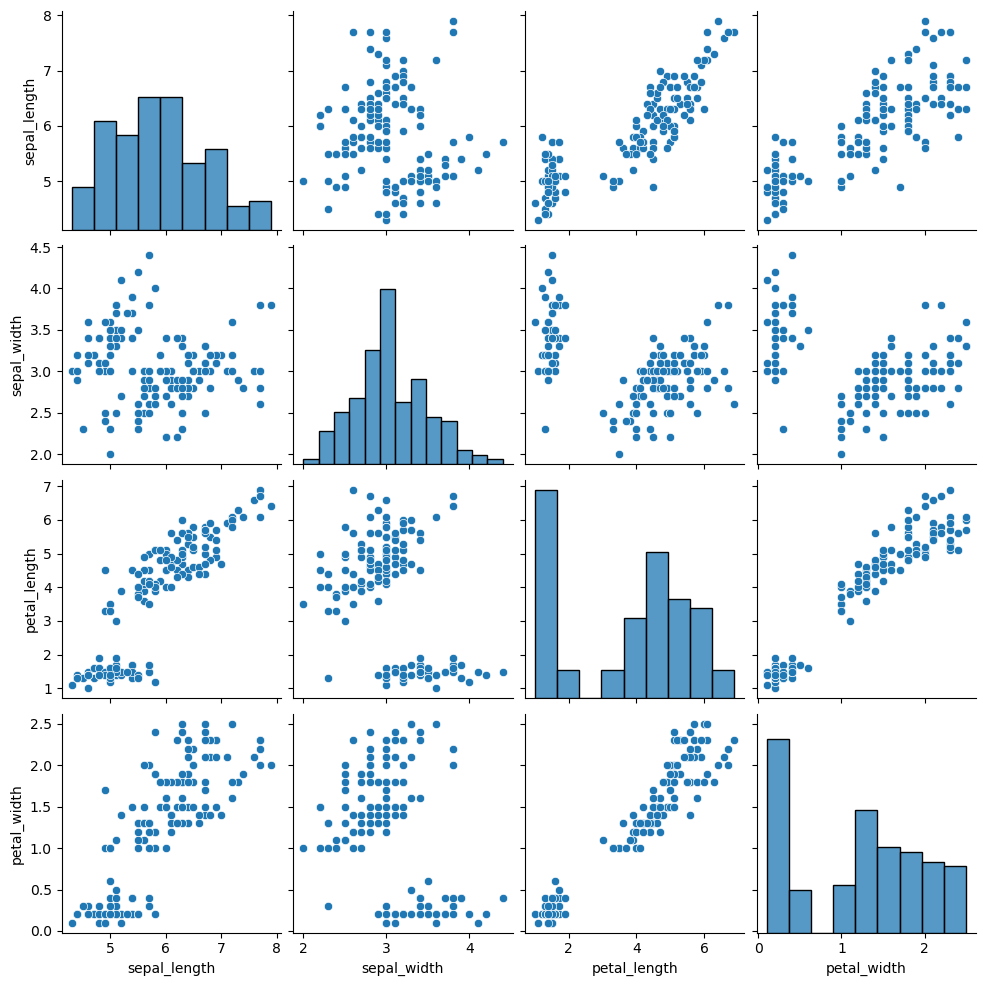

In [115]:
sns.pairplot(iris)
plt.show()

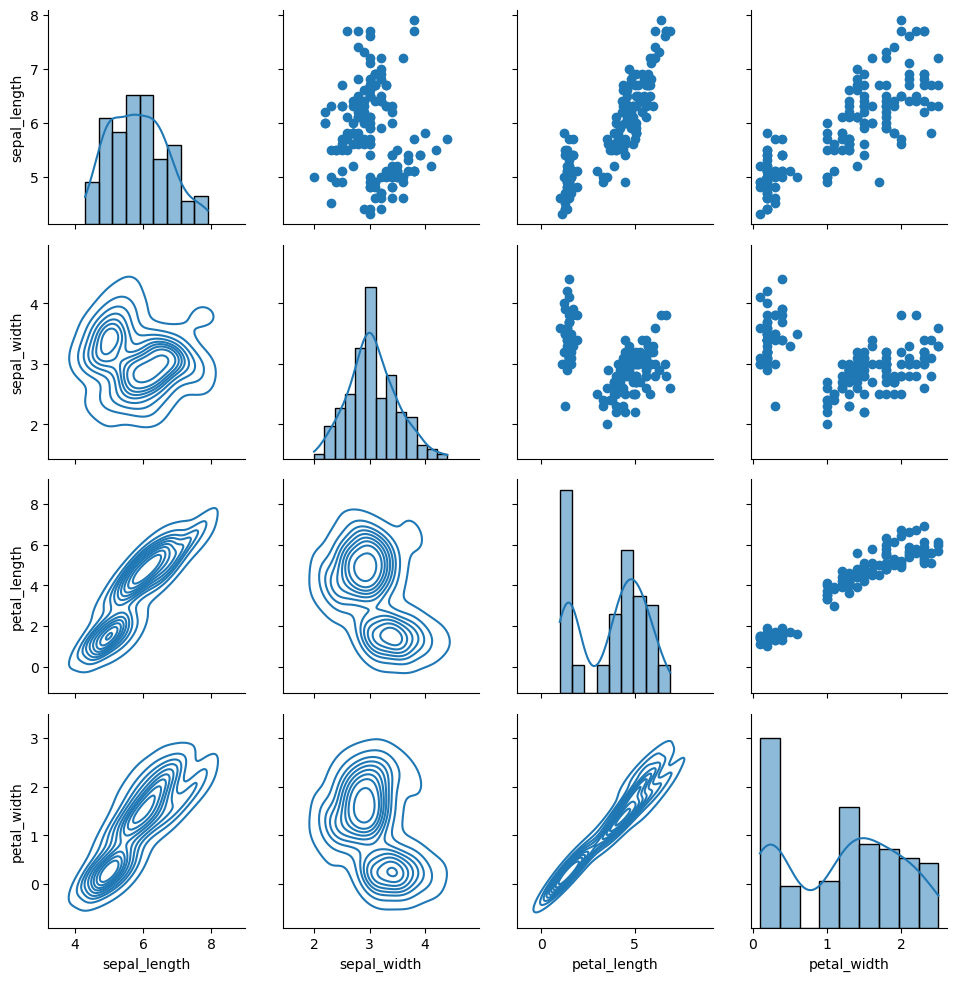

In [145]:
g = sns.PairGrid(iris,)
g.map_diag(sns.histplot,kde=True)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
plt.show()

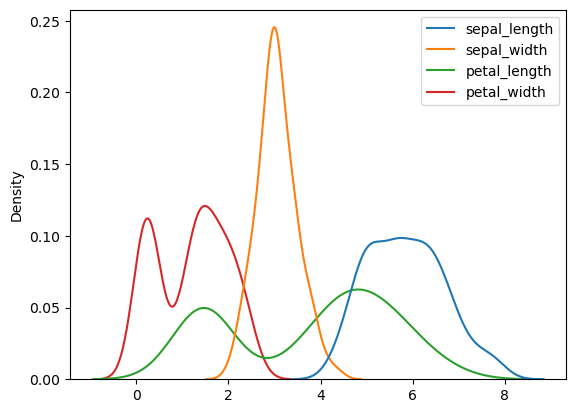

In [147]:
sns.kdeplot(iris)
plt.show()

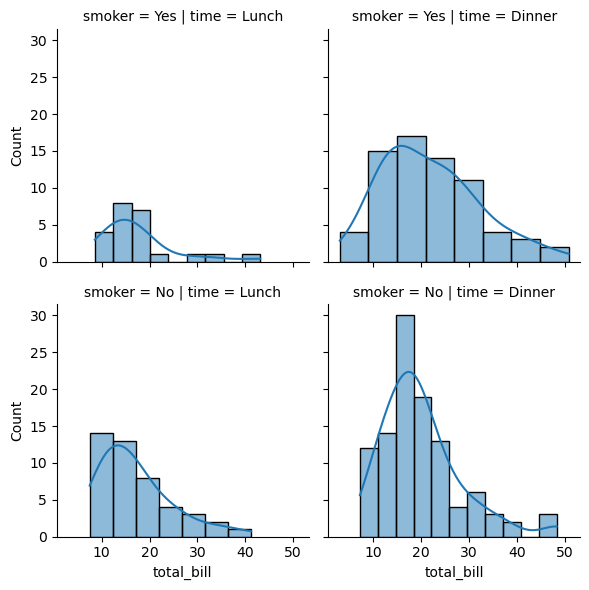

In [155]:
g = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(sns.histplot,'total_bill',kde=True)
plt.show()

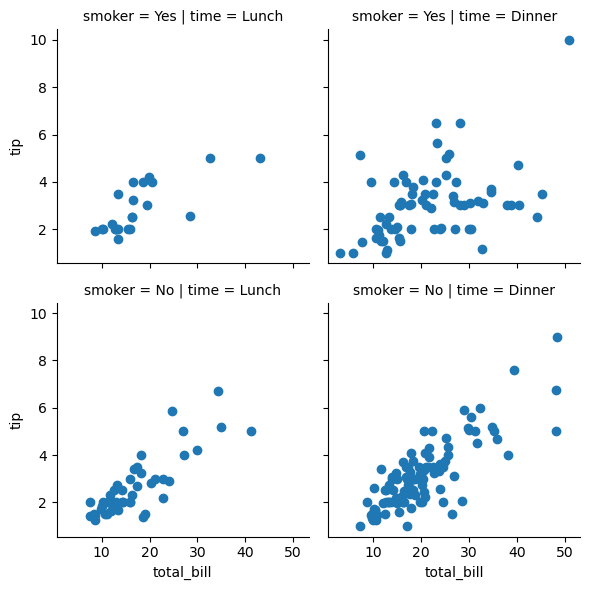

In [163]:
g = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(plt.scatter,'total_bill','tip')
plt.show()

Regression Plots

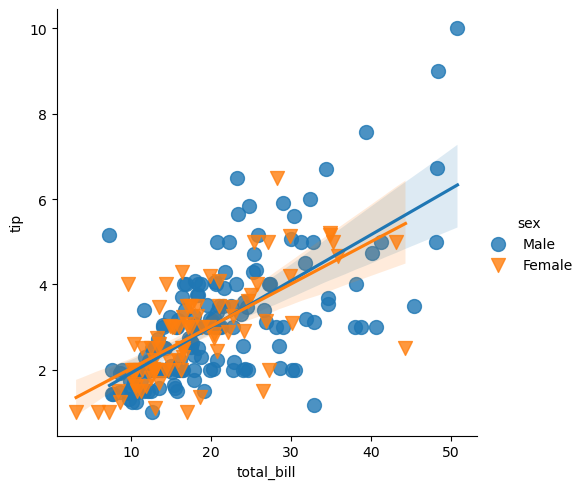

In [178]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'],
          scatter_kws={'s':100})
plt.show()

#can call matplotlib to change marker size for scatter plot, refer to documentation

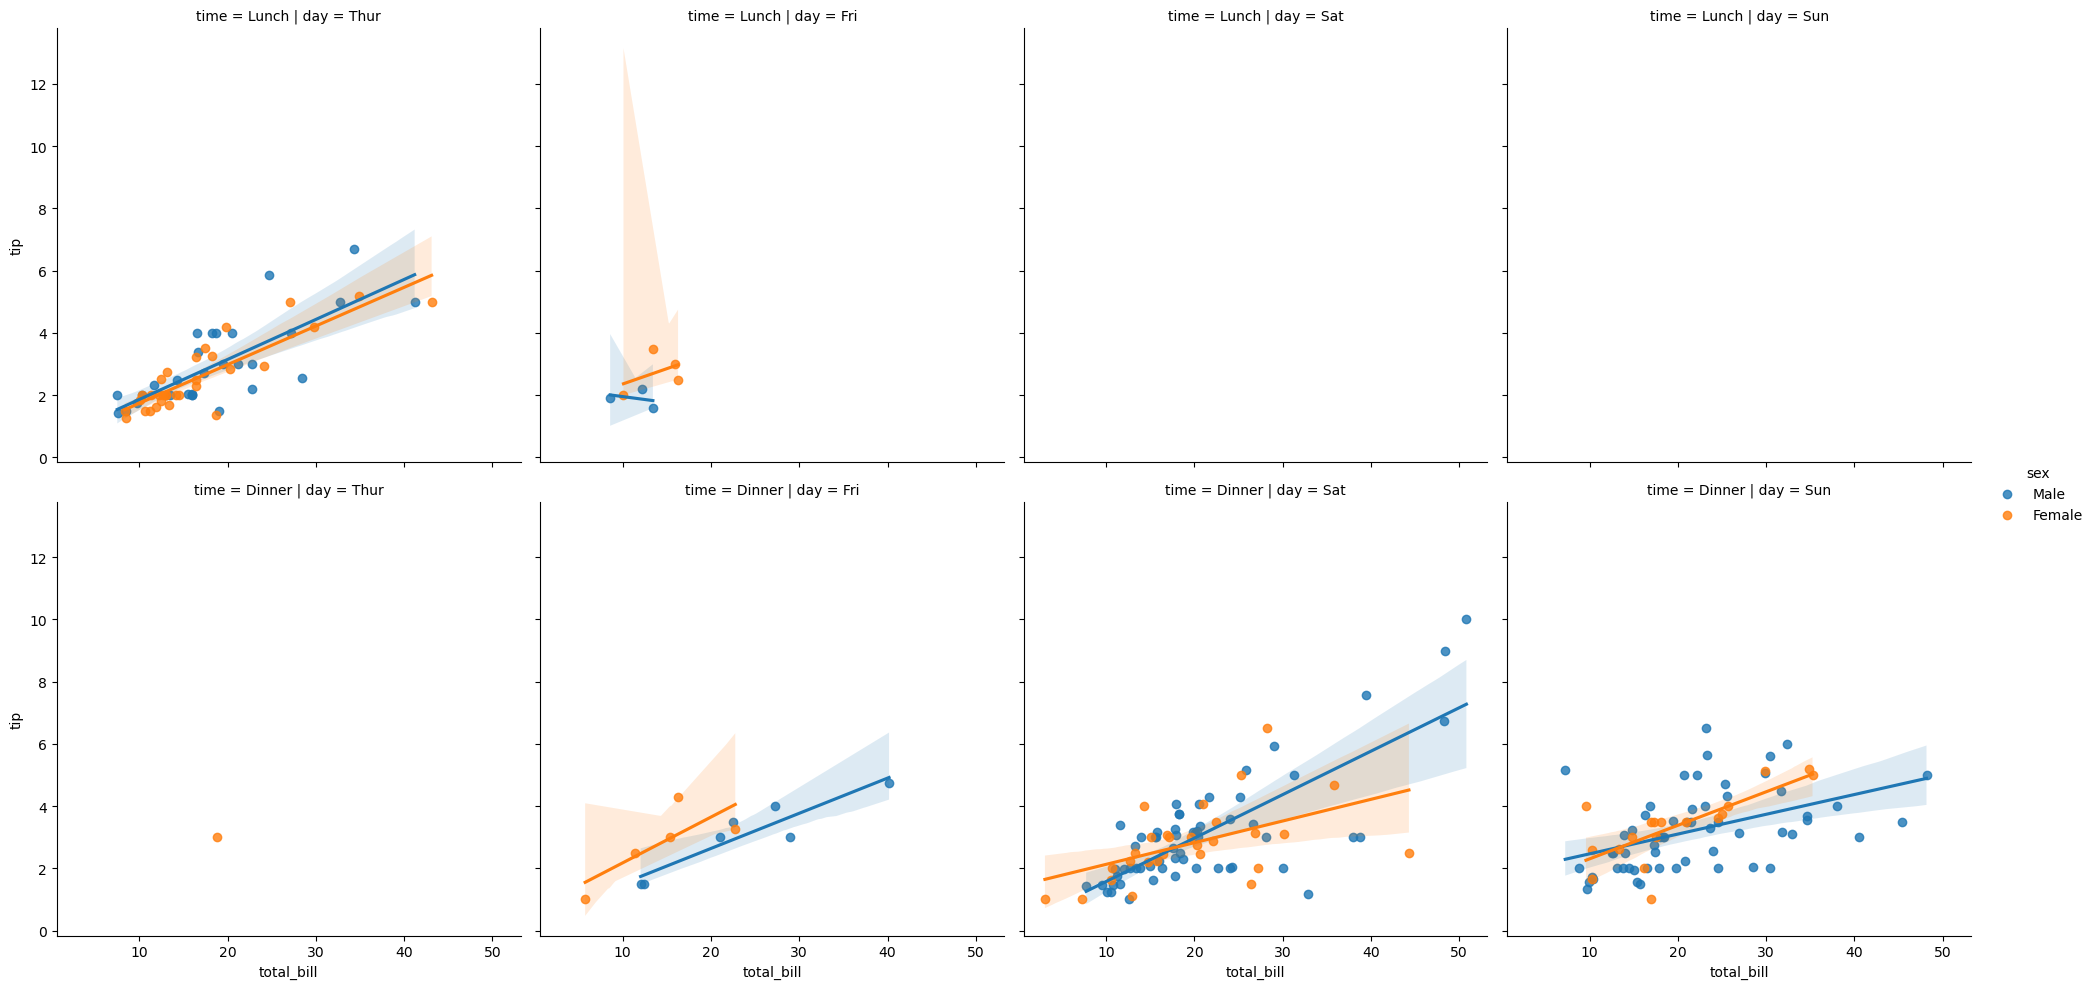

In [188]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',row='time',hue='sex')
plt.show()

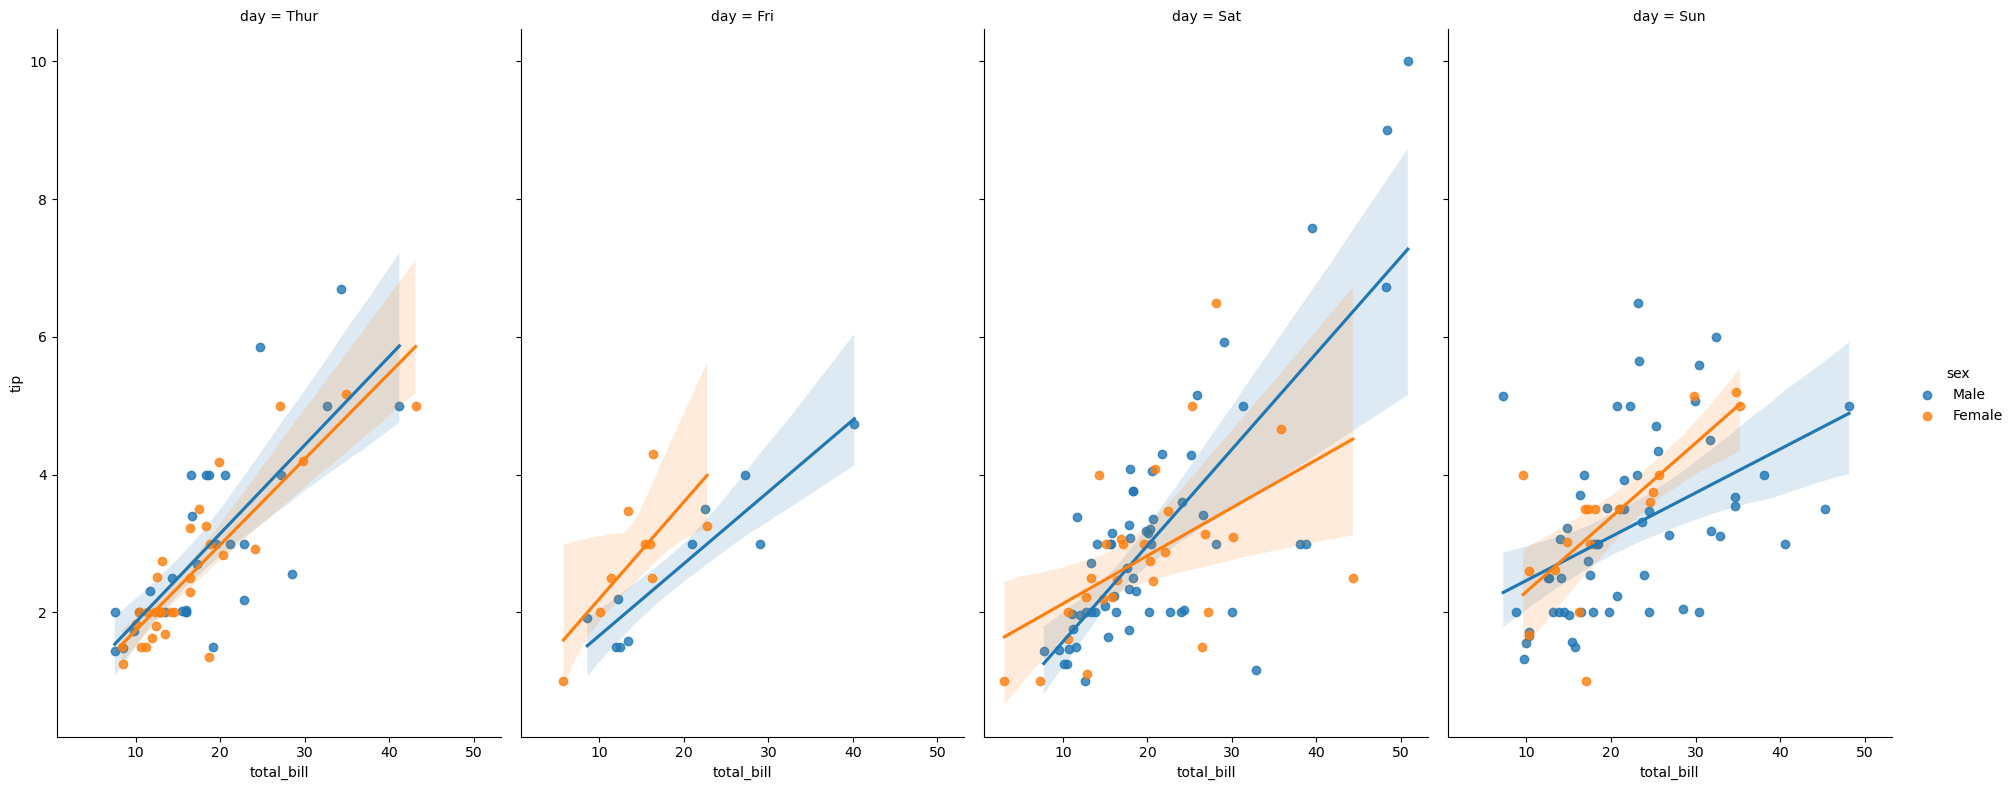

In [194]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',
          aspect=0.6,height=8)
plt.show()

Styles and Color Lecture

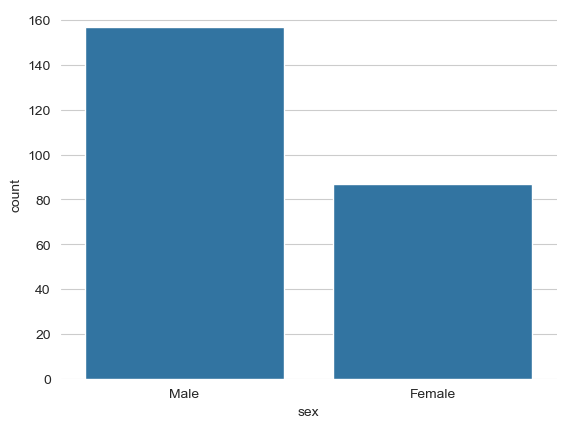

In [221]:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=tips)
sns.despine(left=True,bottom=True)
plt.show()

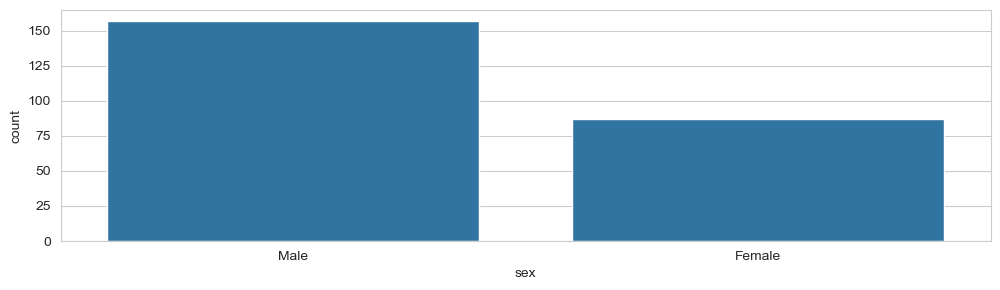

In [223]:
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)
plt.show()

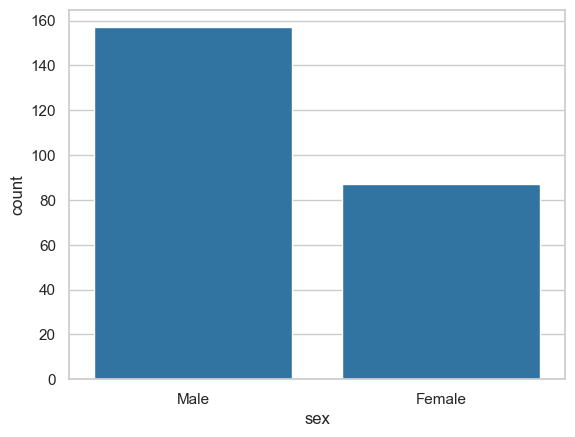

In [235]:
sns.set_context(context='notebook',font_scale=1)
sns.countplot(x='sex',data=tips)
plt.show()

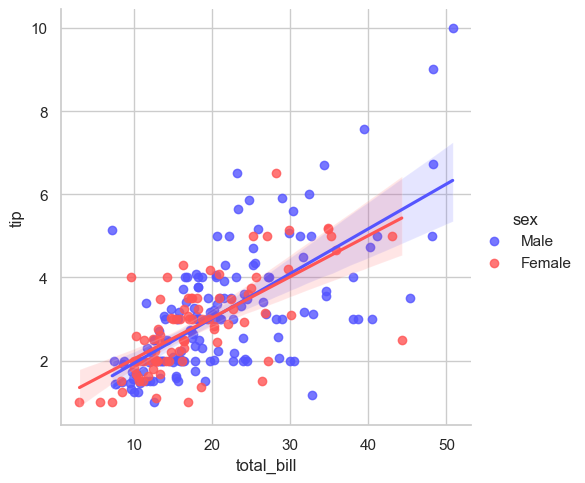

In [241]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='seismic')
plt.show()